## Dataset Analyzer

In [70]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np
import matplotlib.font_manager as fm
from PIL import Image
import cv2
import numpy as np


# Load a Japanese font
fontprop = fm.FontProperties(fname='NotoSansJP-Regular.ttf',size=15)

def get_paths(FOLDER_DIR):
    paths = glob.glob(FOLDER_DIR + "/*.png")
    assert len(paths) != 0
    return paths


def find_matching_char(search_char,paths):
    """ Takes two input arguments: search_char, a string representing the character to search for, and paths, a list of file paths. It returns a list of file paths that contain the specified search character."""
    matching_paths = []

    for path in paths:
        if search_char in path:
            matching_paths.append(path)
    return matching_paths

def plot_images(paths, labels = [], is_save=True, filename = "my_plot.png"):
    assert len(paths) < 300
    assert len(paths) != 0 
    
    if len(labels) == 0:
        labels = [os.path.basename(path) for path in paths]
    else:
        labels = [os.path.basename(path) for path in labels]
        
    imgs = [plt.imread(path) for path in paths]
    no_imgs = len(imgs)
    print(no_imgs)
    

    fig = plt.figure(figsize=(48., 48.))
    
    if no_imgs < 10:
        grid = ImageGrid(fig, 111,  # similar to subplot(111)
                         nrows_ncols=(1,10),  # creates 2x2 grid of axes
                         axes_pad=0.5,  # pad between axes in inch.
                         )
    else:
        grid = ImageGrid(fig, 111,  # similar to subplot(111)
                         nrows_ncols=(round(no_imgs/10),10),  # creates 2x2 grid of axes
                         axes_pad=0.5,  # pad between axes in inch.
                         )

    for ax, im,label in zip(grid, imgs, labels):
        # Iterating over the grid returns the Axes.
        ax.imshow(im)
        ax.set_title(label,fontproperties=fontprop)

    if is_save:
        plt.savefig(filename,bbox_inches='tight', pad_inches=0)
    plt.show()
    
def plot_sidebyside():
    # Load the two images
    image1 = cv2.imread('train.png')
    image2 = cv2.imread('test.png')

    # Resize the images to have the same height
    h1, w1 = image1.shape[:2]
    h2, w2 = image2.shape[:2]
    if h1 > h2:
        image1 = cv2.resize(image1, (int(w1 * h2 / h1), h2))
    else:
        image2 = cv2.resize(image2, (int(w2 * h1 / h2), h1))

    # Create a blank image to stack the two images vertically
    height, width = image1.shape[:2]
    stacked = np.zeros((height, 2 * width + 10, 3), dtype=np.uint8)

    # Copy the first image to the left half of the stacked image
    stacked[:, :width, :] = image1

    # Copy the second image to the right half of the stacked image
    stacked[:, width+10:, :] = image2

    # Draw a red boundary between the two images
    cv2.rectangle(stacked, (width, 0), (width+10, height), (0, 0, 255), -1)

    # Save the stacked image
    cv2.imwrite('train_and_test.jpg', stacked)
    print("Check output: train_and_test.jpg")
    
def compare_train_testSet(char, TRAIN_DIR, TEST_DIR):
    """ Plot the image side by side. Left side is train images and righ side is test images """
    train_paths = get_paths(TRAIN_DIR)
    test_paths = get_paths(TEST_DIR)
    
    train_matching_paths = find_matching_char(char,train_paths)
    test_matching_paths = find_matching_char(char,test_paths)
    print(len(train_matching_paths))
    print(len(test_matching_paths))
    print(test_matching_paths)
    
    plot_images(train_matching_paths, filename="train.png")
    plot_images(test_matching_paths, filename="test.png")
    
    try:
        plot_sidebyside()
    except Exception as error:
        print("Error", error)

## Compare the train and test dataset by character

110
5
['/mnt/01D624E6112E18C0/tlt-experiments/FPT/05_05-Handwritten_Customer_TestSet/output/haba_場.png', '/mnt/01D624E6112E18C0/tlt-experiments/FPT/05_05-Handwritten_Customer_TestSet/output/ikegami_場.png', '/mnt/01D624E6112E18C0/tlt-experiments/FPT/05_05-Handwritten_Customer_TestSet/output/matsumura_場.png', '/mnt/01D624E6112E18C0/tlt-experiments/FPT/05_05-Handwritten_Customer_TestSet/output/tsugawa_場.png', '/mnt/01D624E6112E18C0/tlt-experiments/FPT/05_05-Handwritten_Customer_TestSet/output/morishima_場.png']
110


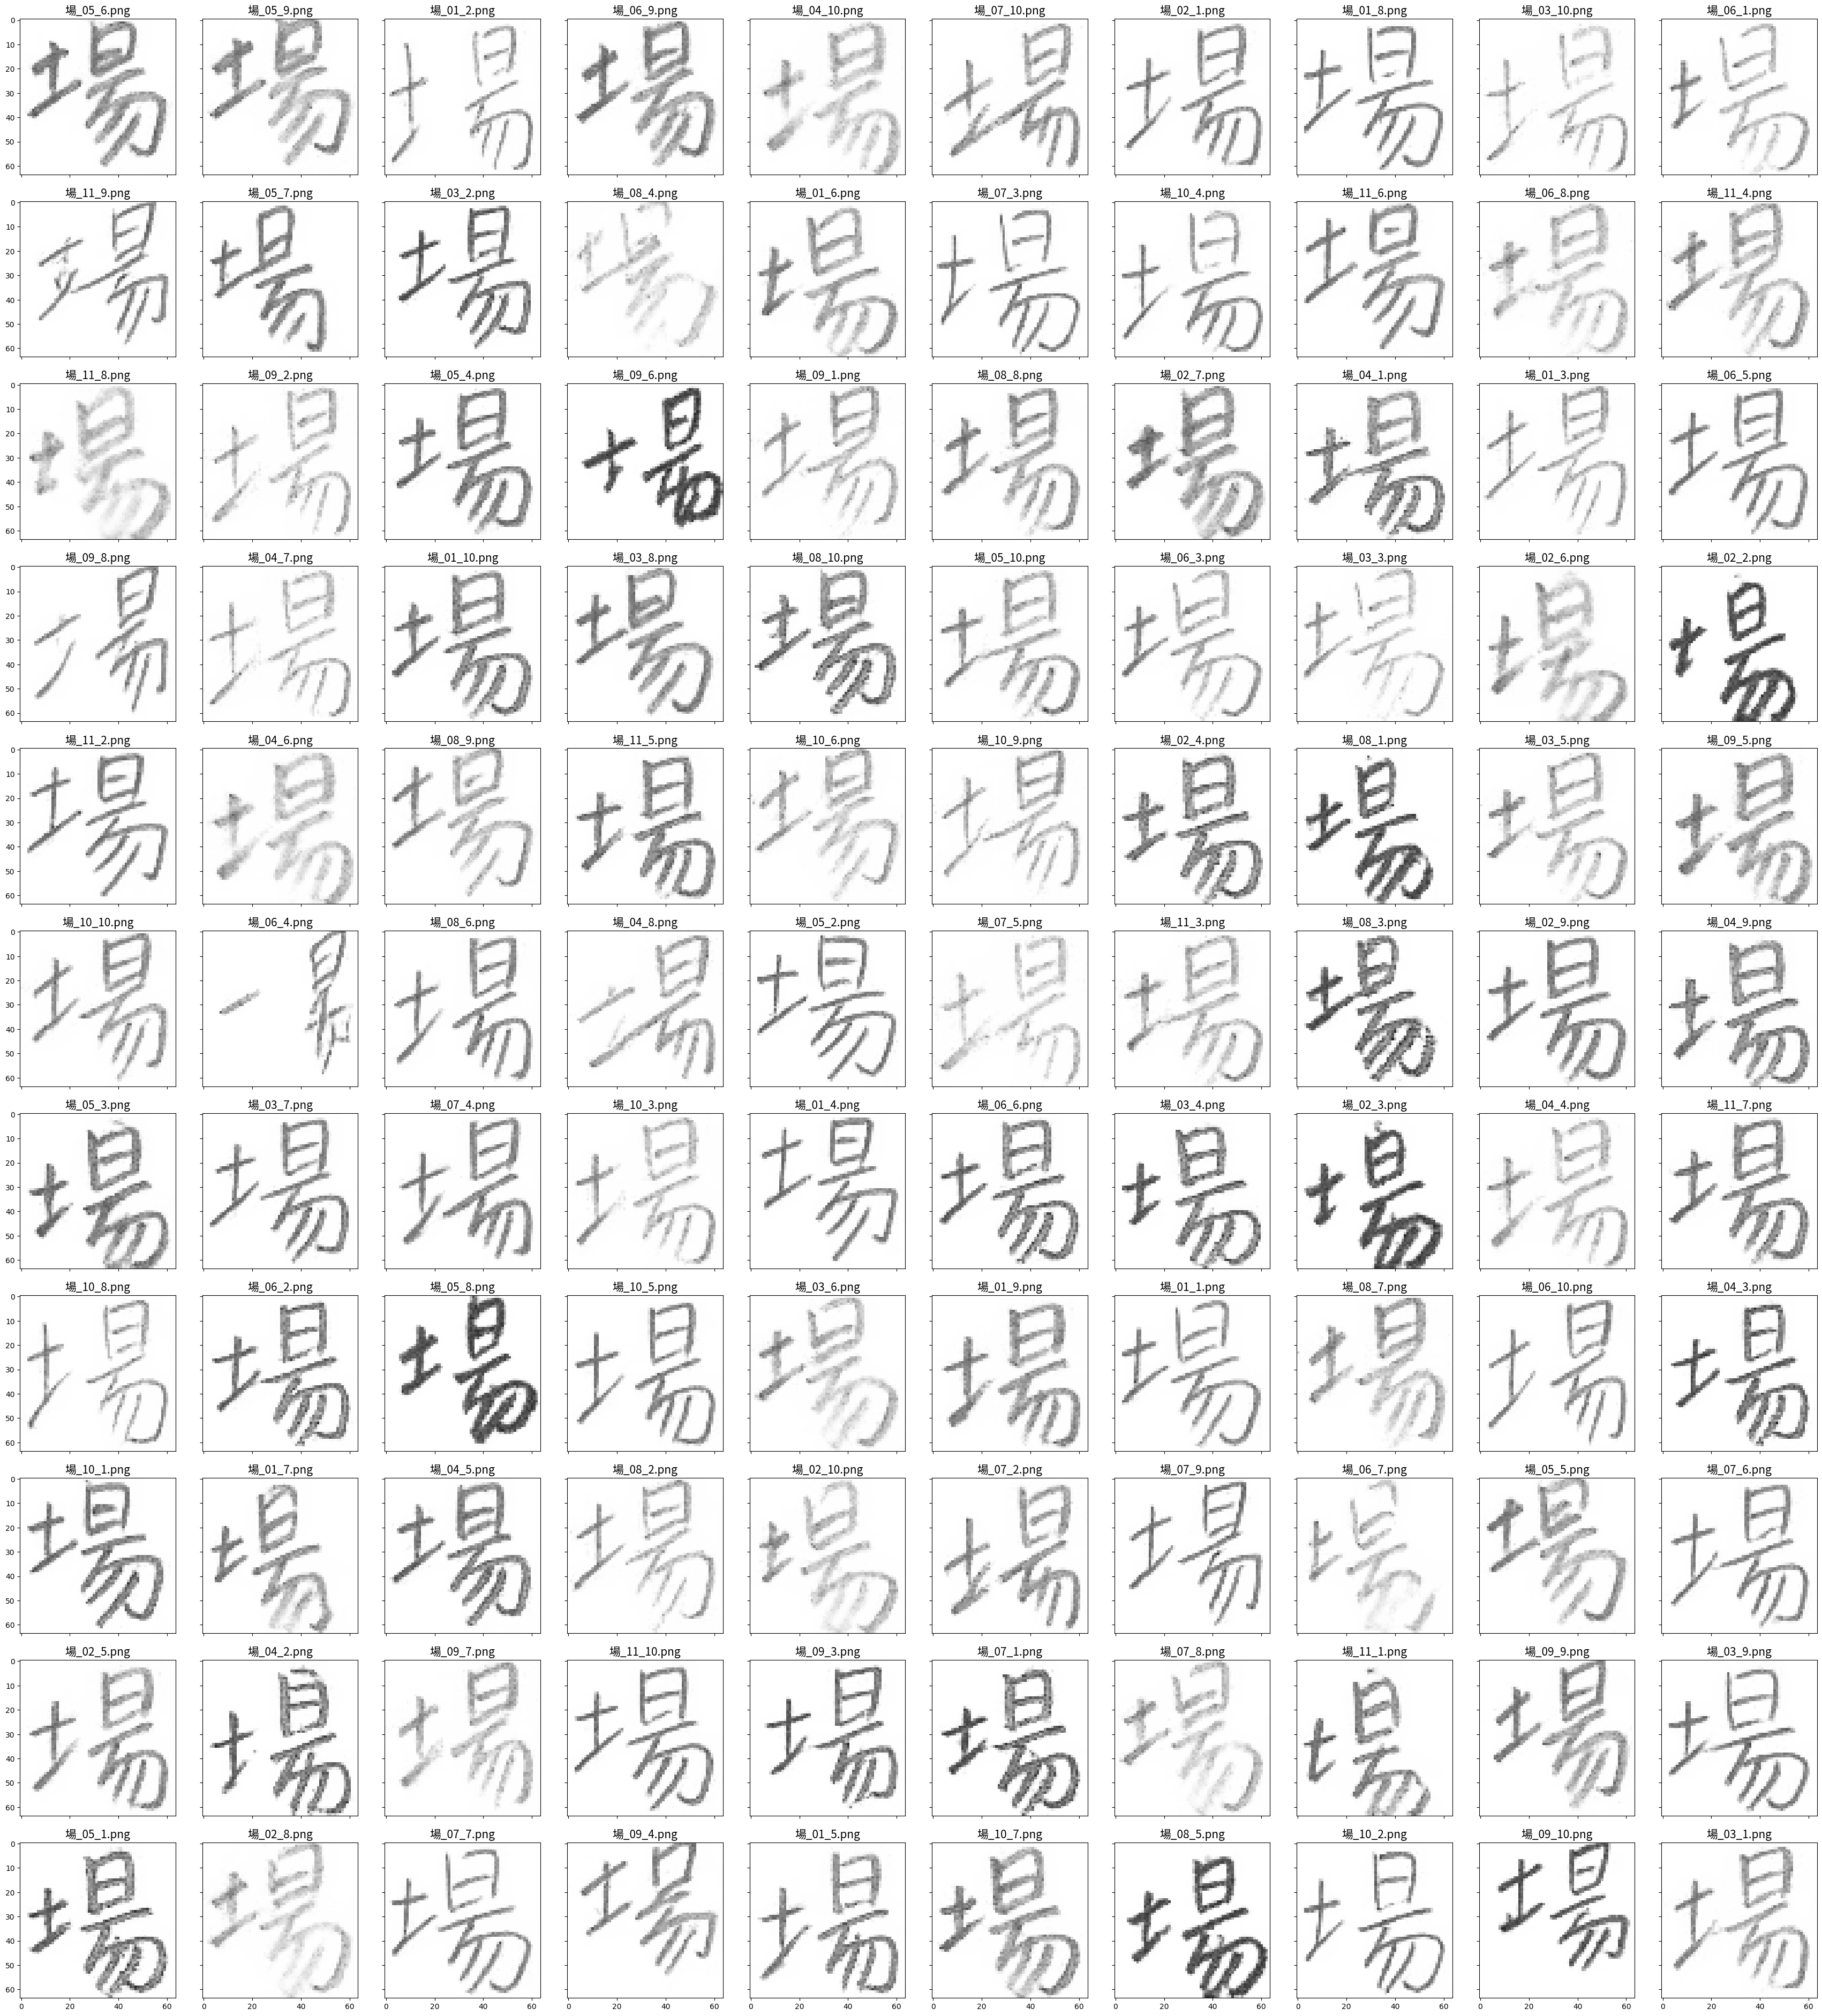

5


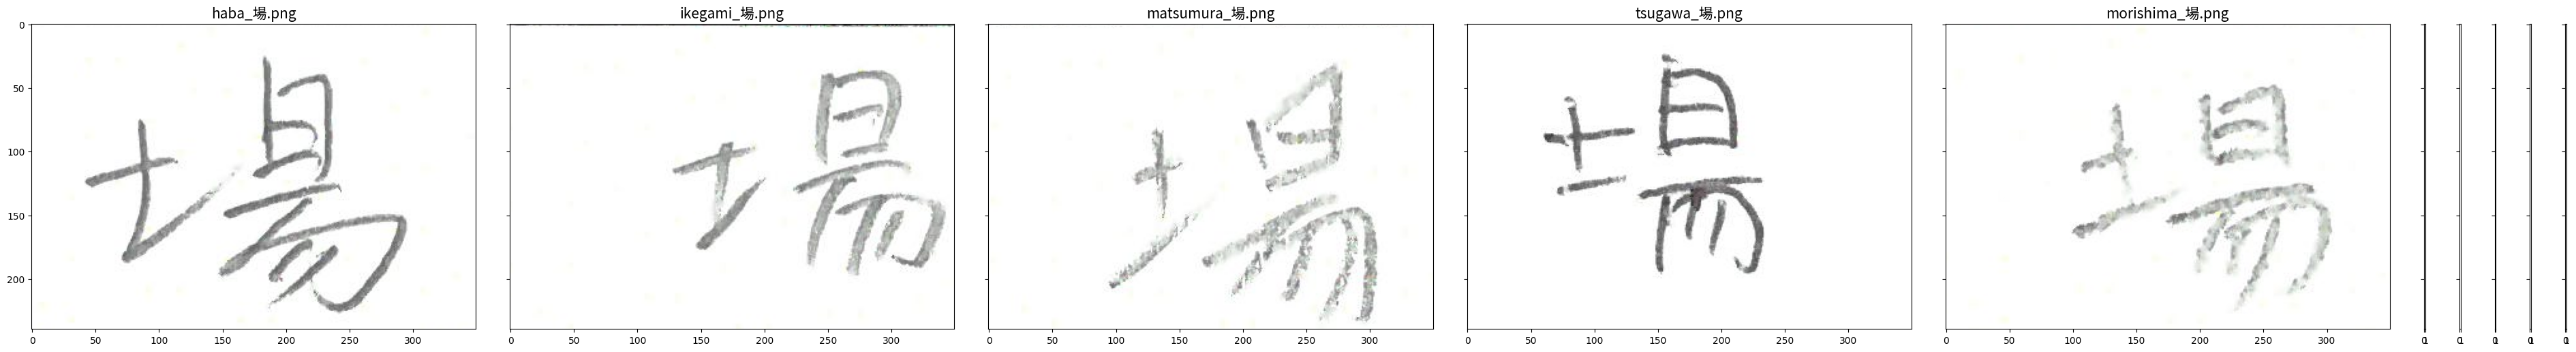

Error could not broadcast input array from shape (496,3760,3) into shape (496,447,3)


In [71]:
TRAIN_DIR = "/mnt/6ff19c96-33ad-4ca2-a50c-63ee1355eb0a/FTPT/STVR_Rec/PaddleOCR/train_data/rec/train"
TEST_DIR = "/mnt/01D624E6112E18C0/tlt-experiments/FPT/05_05-Handwritten_Customer_TestSet/output"
compare_train_testSet("場", TRAIN_DIR, TEST_DIR)

## Plot the train dataset by character

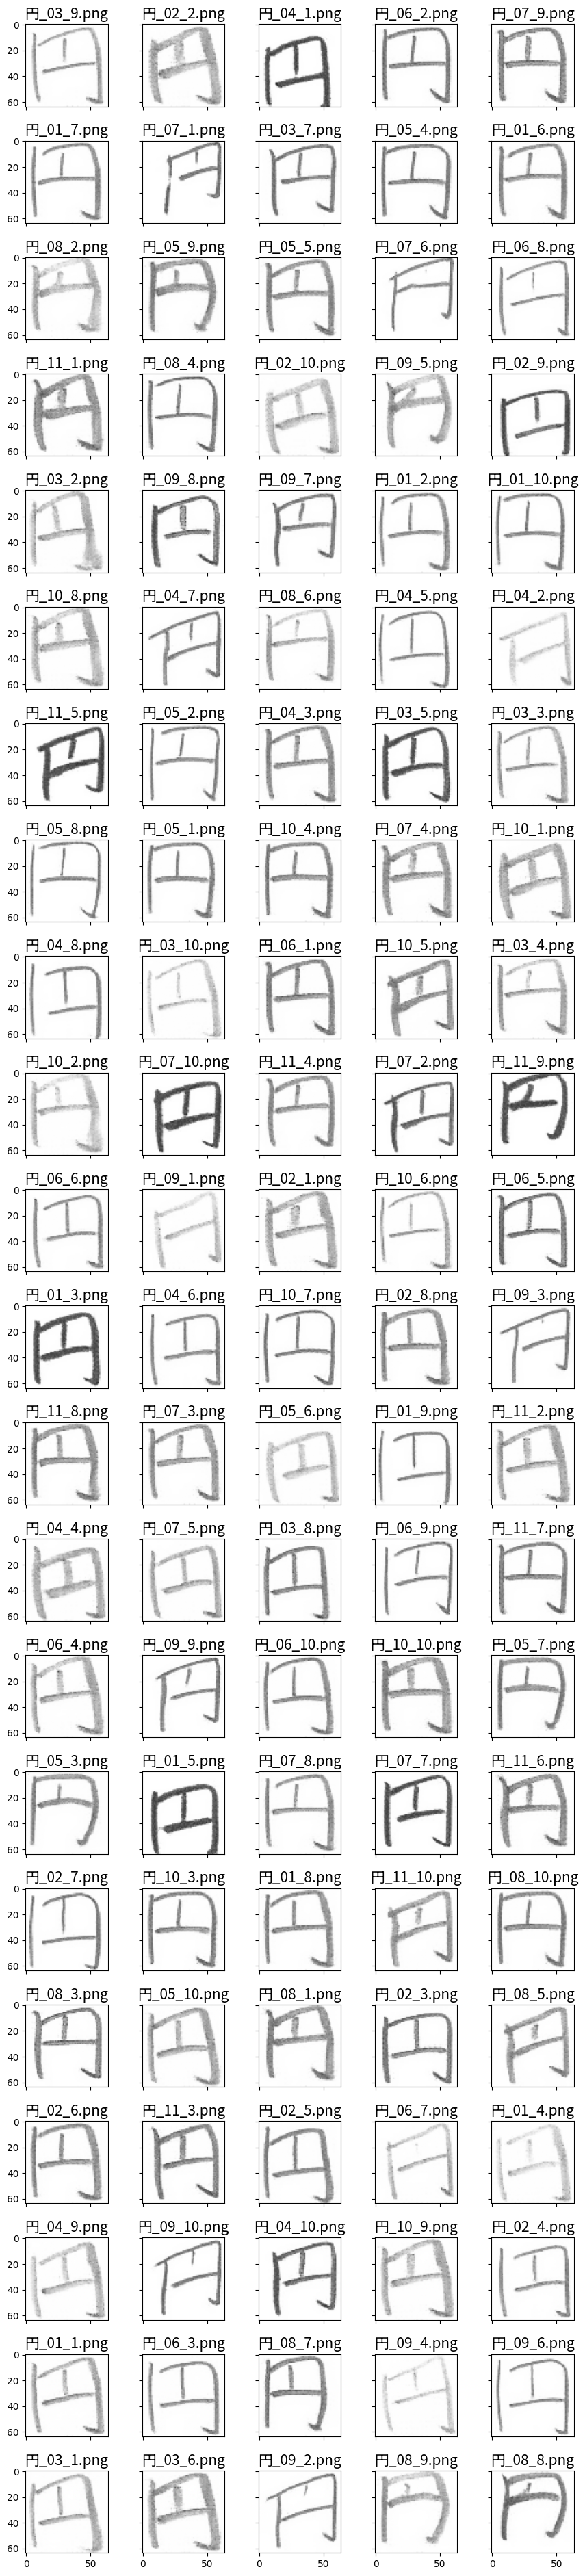

In [45]:
matching_chars = find_matching_char("円", paths)
plot_images(matching_chars)

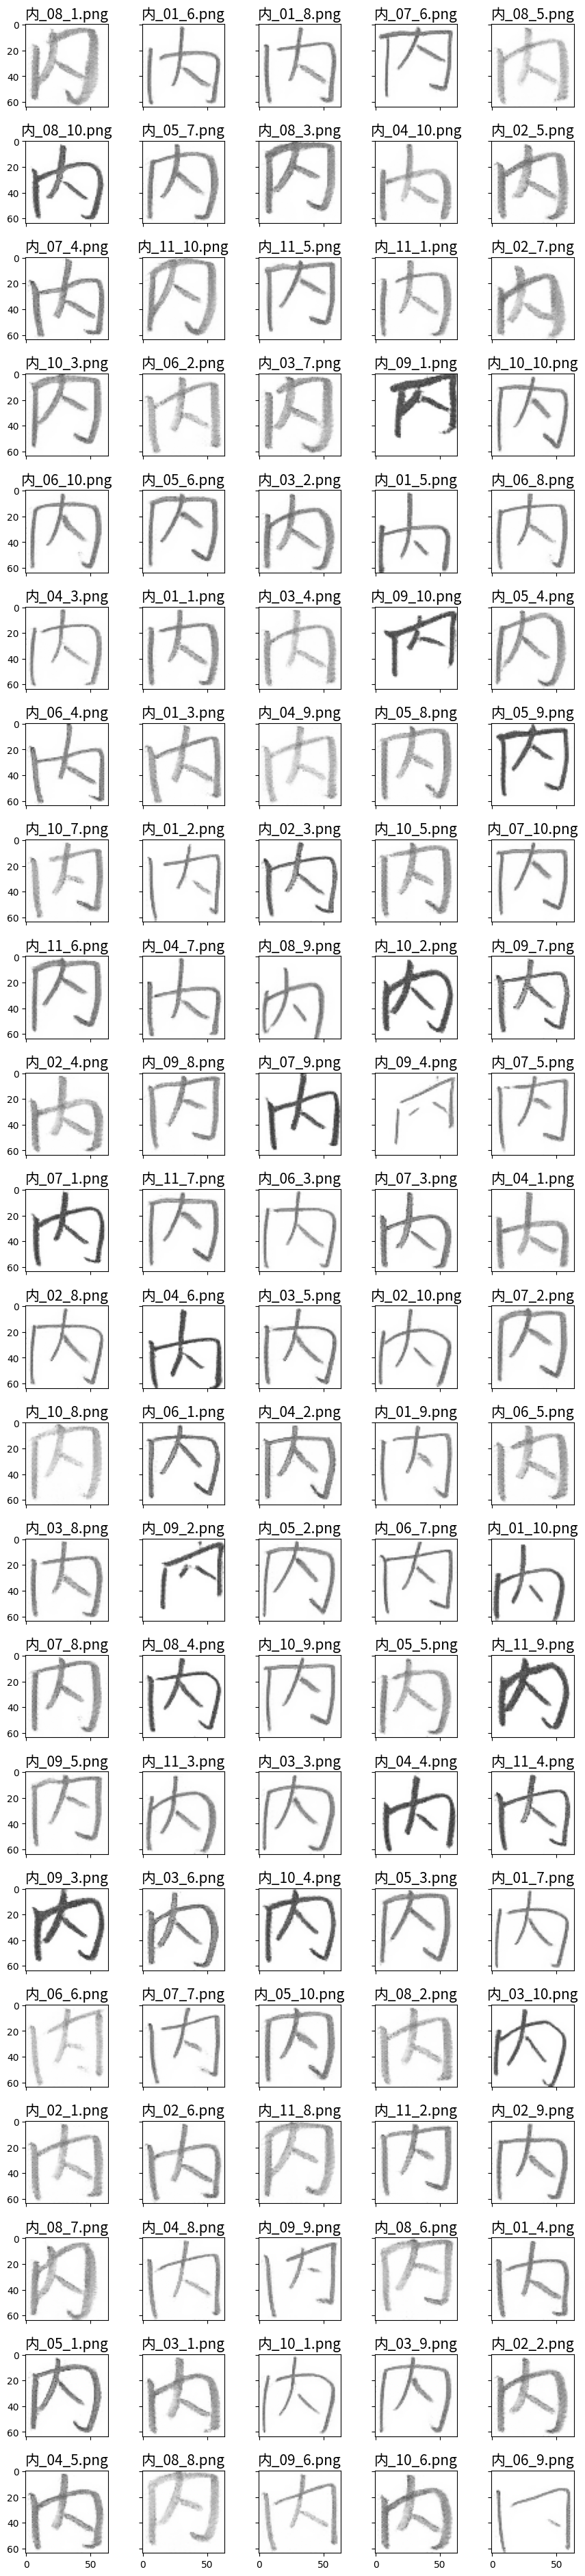

In [43]:
matching_chars = find_matching_char("内", paths)
plot_images(matching_chars)